# 시그모이드 함수 그리기

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

- 주어진 데이터에 가장 적합한 w와 b를 구하는 것이 목적이다.
- x가 0일 때 출력 값이 0.5를 갖는다.

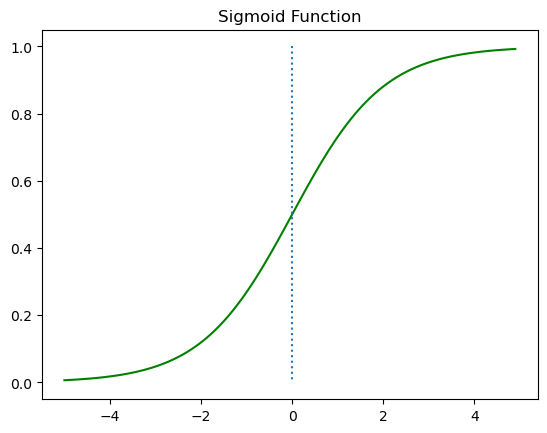

In [3]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0, 0.0],':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

- w의 값에 따라 경사도가 바뀐다. (선형회귀에서 w가 직선의 기울기를 의미하는 것과 동일)

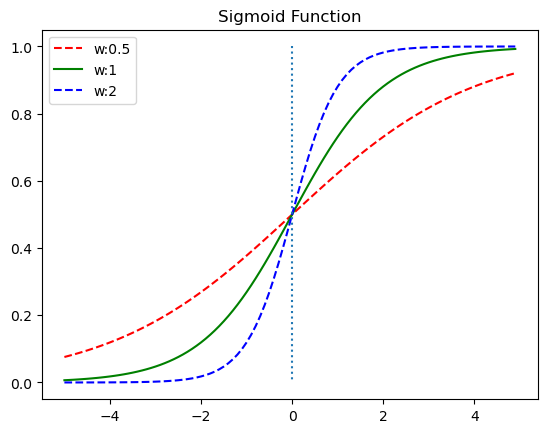

In [4]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r--', label='w:0.5')  # w가 0.5일 때
plt.plot(x, y2, 'g', label='w:1')    # w가 1일 때
plt.plot(x, y3, 'b--', label='w:2')    # w가 2일 때

plt.plot([0,0],[1.0, 0.0],':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.legend()
plt.show()

# 유방암 판별 예측
- y변수가 범주형인 경우

## 패키지 로딩

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd


## 데이터 로드 및 확인

In [6]:
breast = load_breast_cancer()
# print(breast.DESCR)

df = pd.DataFrame(breast.data, columns=breast.feature_names)
df.head()
df['class'] = breast.target
df.head()
df['class'].value_counts()
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## 독립변수 / 종속변수 선택

In [7]:
X = breast.data
y = breast.target

X.shape, y.shape

((569, 30), (569,))

## 데이터 스케일링

In [8]:
scaled_X = StandardScaler().fit_transform(X)

## 학습 데이터와 평가 데이터 분할

In [9]:
# stratify 종속변수 비율에 맞춰서 분배 
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state=0, stratify=y)

## 모델 생성
- 회귀계수 최적화 옵션
    - solver : 최적화 문제에 사용할 알고리즘
        >- 'lbfgs' : solver의 기본값. CPU 코어 수가 많다면 최적화를 병렬로 사용할 수 있다
        >- 'liblinear' : 작은 데이터에 적합한 알고리즘.
        >- 'sag','saga' : 확률적 경사하강법을 기반으로 한 알고리즘으로 대용향 데이터에 적합
        >- 'newton-cg','sag','saga' 및 'libfgs'만 다항 손실을 처리. 즉, 멀티 클래스 분류 모델에 사용 가능
    - solver에 따른 규제 지원 사항
        >- newton-cg, lbfgs, sag : L2
        >- linlinear, saga : L1, L2
    - multi_class : 다중클래스분류 문제의 상황에서 어떤 접근방식을 취할지 결정
        >- 'ovr' : 이진분류기인 sigmoid 함수를 이용하여 결과 예측
        >- 'multinominal' : 각 클래스에 대한 softmax 확률 값으로 다중분류를 수행
    - C : 규제의 강도의 역수. 양의 실수 값. 선형회귀모형에서 alpha이고, SVM과 LogisticRegression과 같이 분류 모델에서는 C를 사용.(C값이 작을수록 모델이 단순해진다.)
    - max_iter : solver가 수렴하는데 필요한 반복 횟수 (default:100)

In [10]:
model = LogisticRegression()
model.fit(X_train, y_train)

print('추정 계수(가중치):', model.coef_)
print('절편:', model.intercept_)

추정 계수(가중치): [[-0.54406091 -0.41605507 -0.51991133 -0.59308816  0.0027904   0.41939012
  -0.78884789 -1.02290774 -0.15221315  0.37699245 -1.07237296 -0.06165012
  -0.54319278 -0.69191037 -0.21537603  0.61125449  0.11034357 -0.26876198
   0.49779553  0.42281321 -0.97636344 -1.08977767 -0.82614726 -0.86970513
  -0.55575019 -0.15928048 -0.62816926 -0.7691139  -0.67505294 -0.73082045]]
절편: [0.23582794]


## 모델 예측

In [11]:
y_hat = model.predict(X_test)
print('예측값:', y_hat[:20])
print('실제값:', y_test[:20])

예측값: [0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0]
실제값: [0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0]


## 평가 지표
- 혼동 행렬 함수는 행을 true, 열을 predict 값으로 이용하며, 양성과 음성의 구분은 별도의 레이블을 지정하지 않으면 레이블 값의 정렬된 순서로 사용한다.(0:Negative, 1:Positive)

<pre>
y_true = [1,0,1,1,0,1]
t_hat =  [0,0,1,1,0,1]
confusion_matrix(y_true, y_hat)
[[2,0],
 [1,3]]
                  Predict
            ----------------
                |  N  |   P
            ----------------
   |        | N |  TN |  FP
   |  True  |---------------
   |        | P |  FN |  TP
   
confusion_matrix(y_true, y_hat, label=[1,0])
</pre>

In [12]:
matrix = confusion_matrix(y_test, y_hat)
print(matrix)

[[ 61   3]
 [  4 103]]


In [13]:
accuracy = accuracy_score(y_test, y_hat)
print(f'정확도:{accuracy:.3f}') #(61 + 103) / (61 + 3 + 4 + 103)

precision = precision_score(y_test, y_hat)
print(f'정밀도:{precision:.3f}') # 103 / ( 3 + 103)

recall = recall_score(y_test, y_hat)
print(f'재현율:{recall:.3f}')  # 103 / ( 4 + 103)

# [ N으로 예측할 확률, P로 예측할 확률]
pred_proba_positive = model.predict_proba(X_test)[:,1]
np.round(pred_proba_positive, 3)

# fpr, tpr, threshold 값 반환
fpr, tpr, threshold = roc_curve(y_test, pred_proba_positive)
roc_data = np.concatenate([fpr.reshape(-1,1), tpr.reshape(-1,1), np.round(threshold.reshape(-1,1),3)], axis=1)
roc_data = pd.DataFrame(roc_data, columns=['FPR','TPR','THRESHOLD'])
display(roc_data)
auc = roc_auc_score(y_test, pred_proba_positive)
print(f'AUC:{auc:.3f}')

정확도:0.959
정밀도:0.972
재현율:0.963


,FPR,TPR,THRESHOLD
0,0.000000,0.000000,2.000
1,0.000000,0.009346,1.000
2,0.000000,0.897196,0.906
3,0.015625,0.897196,0.903
4,0.015625,0.915888,0.882
5,0.031250,0.915888,0.875
6,0.031250,0.953271,0.602
7,0.046875,0.953271,0.537
8,0.046875,0.971963,0.493
9,0.062500,0.971963,0.432


AUC:0.996


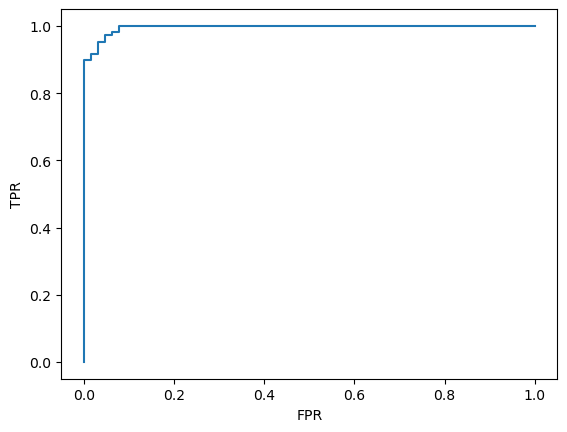

In [14]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [15]:
optimal_threshold = threshold[np.argmax(tpr - fpr)]
print('최적의 임계값:',optimal_threshold)

최적의 임계값: 0.4930703132068848


## 임계값 변화에 따른 재현율과 정밀도 변환 확인

In [16]:
from sklearn.metrics import classification_report

def threshold_filter(prob, threshold):
    return np.where(prob > threshold, 1, 0)

pred_1 = threshold_filter(pred_proba_positive, 0.5)
pred_2 = threshold_filter(pred_proba_positive, 0.6)
pred_3 = threshold_filter(pred_proba_positive, 0.8)

print(classification_report(y_test, pred_1))
print('-'*100)
print(classification_report(y_test, pred_2))
print('-'*100)
print(classification_report(y_test, pred_3))


              precision    recall  f1-score   support

           0       0.94      0.95      0.95        64
           1       0.97      0.96      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        64
           1       0.98      0.95      0.97       107

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        64
           1       0.98      0.93  

## solver별 성능평가 비교

In [17]:
solvers = ['lbfgs','liblinear','newton-cg','sag','saga']

for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=600)
    model.fit(X_test, y_test)
    y_hat = model.predict(X_test)
    
    print(f'solver:{solver}, accuracy:{accuracy_score(y_test, y_hat):.3f}, roc_auc:{roc_auc_score(y_test, model.predict_proba(X_test)[:,1]):.3f}')

solver:lbfgs, accuracy:0.988, roc_auc:0.999
solver:liblinear, accuracy:0.988, roc_auc:0.999
solver:newton-cg, accuracy:0.988, roc_auc:0.999
solver:sag, accuracy:0.988, roc_auc:0.999
solver:saga, accuracy:0.988, roc_auc:0.999


# [실습] 개인 신용도를 기반으로 대출 가능여부 예측하기
- 데이터 구조
    - Age : 나이
    - Experience : 경력
    - Income : 연소득
    - ZIP Code : 우편번호
    - Family : 가족 수
    - CCAvg : 월 평균 카드 사용액
    - Education : 교육수준 (1:학부, 2:대학원, 3:고급/전문)
    - Mortgage : 가계대출
    - Personal Loan : 대출 승인여부
    - Securities Account : 유가증권 계좌유무
    - CD Account : 양도예금증서 계좌 유무
    - Online : 온라인계좌 유무
    - CreditCard : 신용카드 유무
- 처리 조건 : 불필요한 컬럼삭제 (ID, Zip Code)

In [18]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


추정계수: [-0.09  0.11  0.05  0.73  0.11  1.7   0.   -0.91  3.27 -0.57 -0.78]
추정계수(odds비): [ 0.91  1.12  1.06  2.07  1.12  5.47  1.    0.4  26.25  0.56  0.46]


,가중치,Odds비
Age,-0.094437,0.909885
Experience,0.113641,1.120350
Income,0.053919,1.055399
Family,0.728610,2.072198
CCAvg,0.113196,1.119851
Education,1.699058,5.468794
Mortgage,0.000431,1.000431
Securities Account,-0.907996,0.403332
CD Account,3.267770,26.252732
Online,-0.572358,0.564194


predict        
               대출불가(0) 대출승인(1)
actual 대출불가(0)    1339      17
       대출승인(1)      50      94

정확도:0.955
정밀도:0.847
재현율:0.653


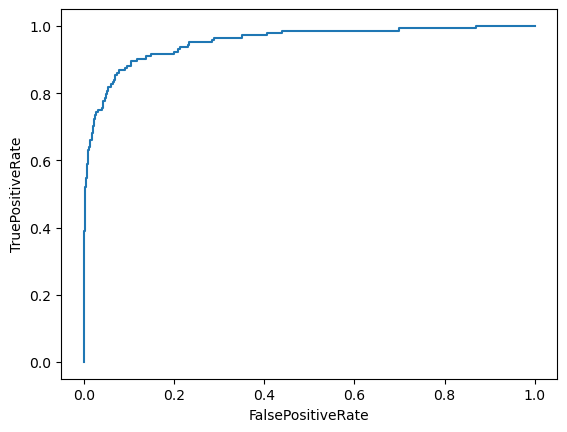

AUC:0.954


In [19]:
# 데이터 로드 및 확인
df = pd.read_csv('datasets/Personal_Loan.csv')
df.head()


# 데이터 전처리
df = df.drop(['ID','ZIP Code'], axis=1)


# 독립변수와 종속변수 분리
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']


# 학습데이터와 평가데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40, stratify=y)


# 모델 생성
model = LogisticRegression(max_iter=2000)

# 모델 학습
model.fit(X_train, y_train)


np.set_printoptions(suppress=True, precision=2)

# 추정계수
coef = model.coef_.squeeze(axis=0)
print('추정계수:', coef)

# 밑에 셀에 odds 설명있음
odds_rate = np.exp(coef)
print('추정계수(odds비):', odds_rate)

coef_df = pd.DataFrame({'가중치':coef, 'Odds비':odds_rate}, index=X.columns)
display(coef_df)


# 모델 예측
y_hat = model.predict(X_test)


# 모델 평가
cf = confusion_matrix(y_test, y_hat)
cf_df = pd.DataFrame(cf, index=[['actual','actual'],['대출불가(0)','대출승인(1)']], columns=[['predict','predict'],['대출불가(0)','대출승인(1)']])
display(cf_df)

print(f'정확도:{accuracy_score(y_test, y_hat):.3f}') 
print(f'정밀도:{precision_score(y_test, y_hat):.3f}') 
print(f'재현율:{recall_score(y_test, y_hat):.3f}')  


# 그래프 그리기
pred_proba_positive = model.predict_proba(X_test)[:,1]

fpr, tpr, threshold = roc_curve(y_test, pred_proba_positive)

plt.plot(fpr, tpr)
plt.xlabel('FalsePositiveRate')
plt.ylabel('TruePositiveRate')
plt.show()

auc = roc_auc_score(y_test, pred_proba_positive)
print(f'AUC:{auc:.3f}')

- 로지스틱 회귀에서 회귀계수의 해석
    - 로지스틱 회귀계수는 지수변환(exp()함수를 취한다)을 해주면 Odds비가 나온다.
    - Odds비: 성공할 확률 / 실패할 확률
    - 대출여부에 영향을 미치는 a변수의 오즈비가 1보다 큰 경우 대출승인확률이 높다는 결과이다.(만약 14라면 대출거부확률보다 대출승인확률이 14배 높다는 의미)

## 교차 검증

In [21]:
from sklearn.model_selection import cross_validate

scores = cross_validate(model, X, y, cv=10, scoring=['accuracy','precision','roc_auc'])

for key,value in scores.items():
    print('평가지표:', key)
    print('평균값:', np.mean(value).round(3))
    print('-'*50)

평가지표: fit_time
평균값: 0.384
--------------------------------------------------
평가지표: score_time
평균값: 0.002
--------------------------------------------------
평가지표: test_accuracy
평균값: 0.95
--------------------------------------------------
평가지표: test_precision
평균값: 0.81
--------------------------------------------------
평가지표: test_roc_auc
평균값: 0.958
--------------------------------------------------


## 학습 모델 저장

In [22]:
# 모델 학습 결과를 pickle 파일로 저장하기 위한 라이브러리
import joblib

joblib.dump(model, './lr_model.pkl')

['./lr_model.pkl']

In [23]:
loaded_model = joblib.load('./lr_model.pkl')
accuracy = loaded_model.score(X_test, y_test)
print(accuracy)

0.9553333333333334
